### 💻 **Network Intrusion and Security Threats Detection**

### 🎯 **Project Objective**
The objective is to simulate and detect potential security threats such as data breaches, account takeovers, or bot activities by detecting anomalies in network traffic patterns, login attempts, data access behavior, and API calls. We will use anomaly detection models to spot these irregularities.


### 🧾 **Feature List**

In [1]:


feature_list = [
    'login_attempts',             # Number of login attempts from an IP
    'failed_logins',              # Number of failed login attempts
    'successful_logins',          # Successful login count
    'data_access_volume',        # Total amount of data accessed (in MB)
    'api_calls',                  # Number of API calls made
    'data_read_rate',             # Speed of data read (MB/s)
    'data_write_rate',            # Speed of data write (MB/s)
    'request_method',             # HTTP method (GET, POST, etc.)
    'request_size',               # Size of requests in bytes
    'request_frequency',          # Requests per minute
    'geolocation',                # Accessing location (e.g., country/region)
    'user_role',                  # User role (admin, user, guest)
    'is_bot',                     # Identifies if request came from a bot (binary)
    'access_time',                # Hour of the day when access occurred
    'session_duration',           # Duration of user session (in seconds)
    'login_location',             # IP address or location of login
    'authentication_method'      # Type of authentication used (password, multi-factor, etc.)
]

### 📦 **Step 1: Import Required Libraries**

In [2]:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
### 🧑‍💻 **Step 2: Simulate Synthetic Network Intrusion Data**
np.random.seed(42)
num_samples = 1000

def simulate_network_data(n):
    data = pd.DataFrame({
        'login_attempts': np.random.poisson(10, n),
        'failed_logins': np.random.poisson(3, n),
        'successful_logins': np.random.poisson(7, n),
        'data_access_volume': np.random.normal(1000, 300, n),
        'api_calls': np.random.poisson(100, n),
        'data_read_rate': np.random.normal(10, 2, n),
        'data_write_rate': np.random.normal(8, 1.5, n),
        'request_method': np.random.choice(['GET', 'POST', 'PUT', 'DELETE'], n),
        'request_size': np.random.normal(200, 50, n),
        'request_frequency': np.random.normal(60, 10, n),
        'geolocation': np.random.choice(['US', 'EU', 'Asia', 'Africa'], n),
        'user_role': np.random.choice(['admin', 'user', 'guest'], n),
        'is_bot': np.random.choice([0, 1], n),
        'access_time': np.random.randint(0, 24, n),
        'session_duration': np.random.normal(3600, 600, n),
        'login_location': np.random.choice(['127.0.0.1', '192.168.1.1', '10.0.0.1'], n),
        'authentication_method': np.random.choice(['password', '2FA', 'OAuth'], n)
    })
    return data

network_data = simulate_network_data(num_samples)
network_data.head()

,login_attempts,failed_logins,successful_logins,data_access_volume,api_calls,data_read_rate,data_write_rate,request_method,request_size,request_frequency,geolocation,user_role,is_bot,access_time,session_duration,login_location,authentication_method
0,12,4,7,863.894719,103,6.707607,9.231466,PUT,149.459721,49.396902,Asia,user,1,16,4228.527261,10.0.0.1,password
1,6,0,5,1157.185562,92,10.259044,5.156381,POST,210.024450,52.666693,Africa,admin,1,17,3247.591428,127.0.0.1,password
2,11,3,8,1245.521620,84,9.674182,8.022001,GET,164.326498,78.289197,Africa,guest,1,3,3965.346933,127.0.0.1,2FA
3,14,0,5,886.085254,104,8.267327,6.992430,DELETE,282.771654,52.865666,EU,guest,0,2,4148.100427,10.0.0.1,password
4,7,3,11,756.436099,104,10.457880,8.868214,POST,157.825725,65.701473,Asia,guest,0,7,2478.798447,10.0.0.1,password


### 🧹 **Step 3: Data Preprocessing & Feature Engineering**

In [4]:
# Convert categorical variables into dummy variables (one-hot encoding)
network_data = pd.get_dummies(network_data, drop_first=True)

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(network_data)

network_data_scaled = pd.DataFrame(scaled_data, columns=network_data.columns)

### 🤖 **Step 4: Train Isolation Forest Model**

In [5]:
# Train the model using Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(network_data_scaled)

# Predict anomaly scores and anomalies
network_data['anomaly_score'] = model.decision_function(network_data_scaled)
network_data['anomaly'] = model.predict(network_data_scaled)

# Map anomalies: 1 -> normal, -1 -> anomaly
network_data['anomaly'] = network_data['anomaly'].map({1: 0, -1: 1})

### 📈 **Step 5: Plot Anomaly Scores Distribution**

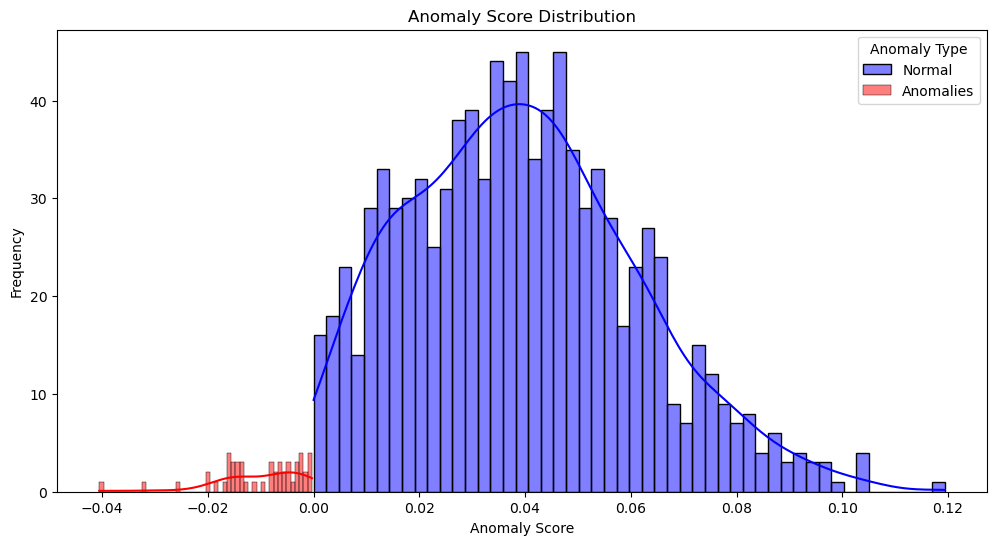

In [7]:
# Separate normal and anomalous data
normal_data = network_data[network_data['anomaly'] == 0]
anomalous_data = network_data[network_data['anomaly'] == 1]

# Plotting Anomaly Scores Distribution for Normal and Anomalous Data
plt.figure(figsize=(12, 6))

# Plot normal data (blue)
sns.histplot(normal_data['anomaly_score'], bins=50, kde=True, color='blue', label='Normal')

# Plot anomalous data (red)
sns.histplot(anomalous_data['anomaly_score'], bins=50, kde=True, color='red', label='Anomalies')

# Add titles and labels
plt.title("Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend(title="Anomaly Type")
plt.show()


### 🧪 **Step 6: Test on Unseen Synthetic Test Data**

In [8]:
# Generate synthetic test data with anomalies
test_data = simulate_network_data(200)

# Inject anomalies by altering certain features
anomaly_indices = random.sample(range(200), 15)
test_data.iloc[anomaly_indices, 0:5] += 50  # Inflate login attempts
test_data.iloc[anomaly_indices, 6] += 10   # Increase read rate
test_data.iloc[anomaly_indices, 10] = 'Asia' # Change geolocation
test_data.iloc[anomaly_indices, 12] = 1      # Mark as bot

# Preprocess the test data
test_data_encoded = pd.get_dummies(test_data, drop_first=True)
scaled_test_data = scaler.transform(test_data_encoded)

# Predict anomalies on the test data
test_data['anomaly'] = model.predict(scaled_test_data)
test_data['anomaly'] = test_data['anomaly'].map({1: 0, -1: 1})

# Extract anomalies for inspection
anomalies = test_data[test_data['anomaly'] == 1]

# Display the detected anomalies
anomalies.head()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,login_attempts,failed_logins,successful_logins,data_access_volume,api_calls,data_read_rate,data_write_rate,request_method,request_size,request_frequency,geolocation,user_role,is_bot,access_time,session_duration,login_location,authentication_method,anomaly
2,61,53,63,1067.310265,139,11.642744,19.130926,GET,253.444589,65.810748,Asia,admin,1,13,3771.924010,192.168.1.1,OAuth,1
10,68,55,56,623.630561,150,6.093629,22.620372,GET,185.847976,60.785947,Asia,guest,1,15,3210.857223,10.0.0.1,password,1
15,12,2,14,782.977837,81,8.028702,9.147942,GET,303.800145,55.852439,Asia,admin,1,5,3769.979514,192.168.1.1,password,1
18,58,54,59,862.919082,143,16.537406,17.290835,POST,207.755302,65.699690,Asia,admin,1,10,3835.046459,192.168.1.1,password,1
26,12,2,13,678.190853,102,10.676299,5.994033,GET,94.746962,59.930663,EU,guest,1,2,3862.103862,127.0.0.1,OAuth,1


### 📤 **Step 7: Export Anomalies to CSV**

In [9]:
anomalies.to_csv("network_intrusion_anomalies.csv", index=False)
print(f"Exported {len(anomalies)} anomalies to 'network_intrusion_anomalies.csv'")




Exported 25 anomalies to 'network_intrusion_anomalies.csv'
